# Data Exploration

# Importing and Loading data

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv(r'\Users\KAYEG\Documents\ASU\FALL - 21 - Term 7\Machine Learning\Project\Project\data.csv', index_col=0)

In [108]:
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


# Summarizing Data

In [109]:
def min_max(series, operation):
    try:
        if(operation == 'min'):
            return series.min()
        return series.max()
    except TypeError:
        return 'N/A'

In [110]:
def create_overview(df):
    overview_df = pd.DataFrame()
    
    overview_df['column_name'] = df.columns
    overview_df['values'] = df.iloc[0,:].values
    overview_df['data_type'] = df.dtypes.values
    overview_df['null_count'] = df.isnull().sum().values
    overview_df['null_count_percent'] = 100 * df.isnull().sum().values /df.shape[0]
    overview_df['min_value'] = df.apply(lambda x: min_max(x, 'min')).values
    overview_df['max_value'] = df.apply(lambda x: min_max(x, 'max')).values
    print("Shape :", df.shape)
    return overview_df

In [111]:
create_overview(df)

Shape : (863, 14)


,column_name,values,data_type,null_count,null_count_percent,min_value,max_value
0,location,104.0,int64,0,0.0,0.0,138.0
1,country,8.0,int64,0,0.0,0.0,33.0
2,gender,1.0,int64,0,0.0,0.0,2.0
3,age,66.0,float64,0,0.0,2.0,96.0
4,vis_wuhan,1.0,int64,0,0.0,0.0,1.0
5,from_wuhan,0.0,int64,0,0.0,0.0,1.0
6,symptom1,14.0,int64,0,0.0,0.0,24.0
7,symptom2,31.0,int64,0,0.0,0.0,31.0
8,symptom3,19.0,int64,0,0.0,0.0,19.0
9,symptom4,12.0,int64,0,0.0,0.0,12.0


# Plotting

## Result Distribution

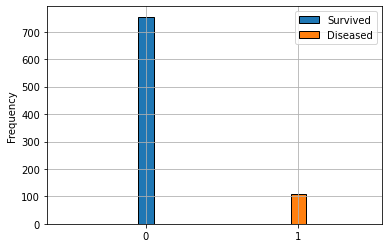

In [112]:
df[df['result'] == 0]['result'].plot(kind='hist', edgecolor='k', grid=True, align='left', label='Survived')
df[df['result'] == 1]['result'].plot(kind='hist', edgecolor='k', grid=True, align='left', label='Diseased')
plt.xticks([0, 1])
plt.legend()

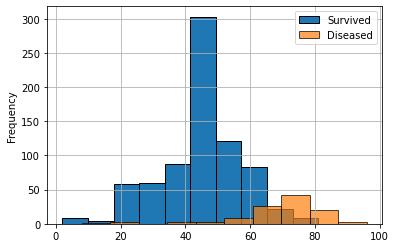

In [113]:
df[df['result'] == 0]['age'].plot(kind='hist', edgecolor='k', grid=True, label='Survived')
df[df['result'] == 1]['age'].plot(kind='hist', edgecolor='k', grid=True, alpha=0.7, label='Diseased')
plt.legend()

<AxesSubplot:ylabel='Frequency'>

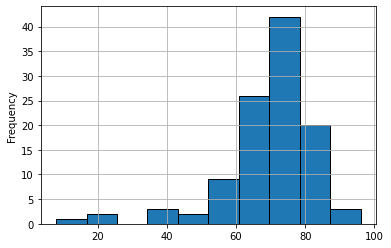

In [114]:
df[df['result'] == 1]['age'].plot(kind='hist', edgecolor='k', grid=True)

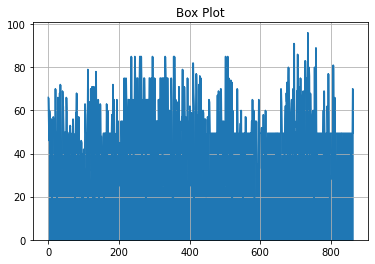

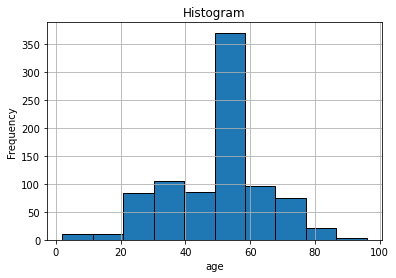

In [124]:
plt.title("Box Plot")
df['age'].plot(kind='density', grid=True);
plt.show()
plt.title("Histogram")
df['age'].plot(kind='hist', edgecolor = 'k', grid=True);
plt.xlabel('age');

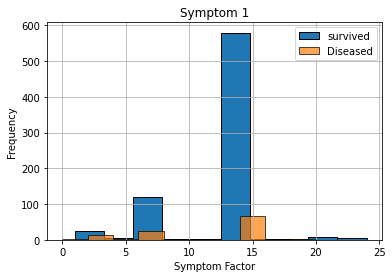

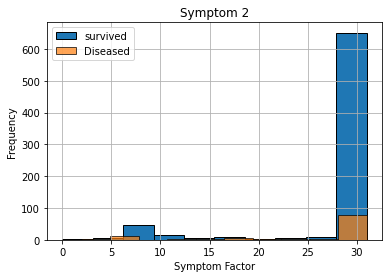

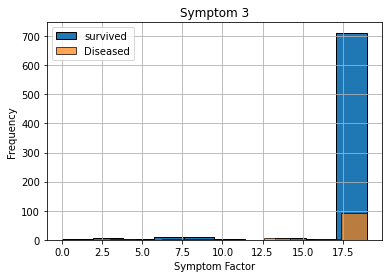

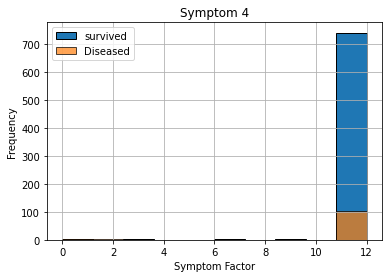

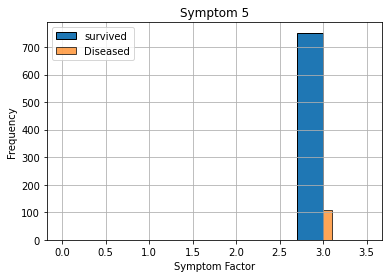

In [117]:
for i in range(1, 6):
    plt.title(f'Symptom {i}')
    df[df['result'] == 0 ][f'symptom{i}'].hist(edgecolor='k', grid=True, label = 'survived')
    df[df['result'] == 1 ][f'symptom{i}'].plot(kind='hist', edgecolor='k', grid=True, label = 'Diseased', alpha=0.7)

    plt.xlabel('Symptom Factor')
    plt.legend()
    plt.show()